# Flip angle map comparison (2D)

## Python standard libraries

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.stats import linregress

## Read rawdata

/home/niesens/miniconda3/envs/MrPhysics/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


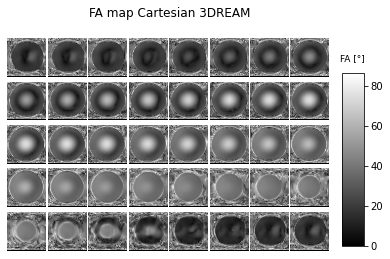

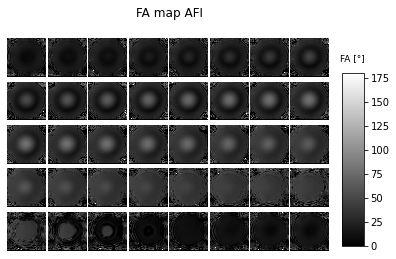

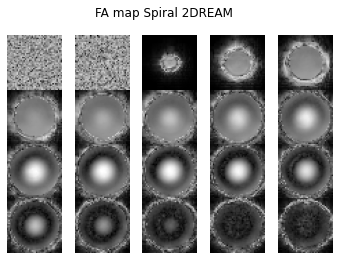

In [2]:
# Cartesian 3DREAM
#fa_Cart = nib.load('/home/niesens/Documents/RawData/20210721/Johnny/nifti/measure0007/measure0007_e2.nii.gz') # invivo
fa_Cart = nib.load('/home/niesens/Documents/RawData/20210727/nifti/measure0004/measure0004_e2.nii.gz') # phantom
fa_Cart = fa_Cart.get_fdata() / 10  # because of DreamAlgo()

slices = int(fa_Cart.shape[2])
subpl_spalt = 8

fig = plt.figure(1)
fig.suptitle('FA map Cartesian 3DREAM')
for slc in range(slices):
    plt.subplot(round(slices/subpl_spalt),subpl_spalt,slc+1)
    im = plt.imshow(fa_Cart[:,:,slc],cmap='gray',vmax=fa_Cart[:,:,:].max())
    plt.axis('off')
plt.subplots_adjust(wspace=0.05,hspace = 0.0)

fig.subplots_adjust(right=0.87);
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.6]); #[left, bottom, width, height]
cbar_ax.set_title('FA [°]', pad=12, fontsize=9);
fig.colorbar(im, cax=cbar_ax);

# AFI
#fa_Afi = nib.load('/home/niesens/Documents/RawData/20210721/Johnny/nifti/measure0010/measure0010_e2.nii.gz') # invivo
fa_Afi = nib.load('/home/niesens/Documents/RawData/20210727/nifti/measure0007/measure0007_e2.nii.gz') # phantom
fa_Afi = fa_Afi.get_fdata()/10  # because of AFIAlgo()

slices = int(fa_Afi.shape[2])
subpl_spalt = 8

fig = plt.figure(3)
fig.suptitle('FA map AFI')
for slc in range(slices):
    plt.subplot(round(slices/subpl_spalt),subpl_spalt,slc+1)
    im = plt.imshow(fa_Afi[:,:,slc],cmap='gray',vmax=fa_Afi[:,:,:].max())
    plt.axis('off')
plt.subplots_adjust(wspace=0.05,hspace = 0.0)

fig.subplots_adjust(right=0.87);
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.6]); #[left, bottom, width, height]
cbar_ax.set_title('FA [°]', pad=12, fontsize=9);
fig.colorbar(im, cax=cbar_ax);

# Spiral 2DREAM
fa_map2D = np.load('/home/niesens/Documents/fire_setup/debug/fa_unf_arr.npy')

slices = fa_map2D.shape[0]
fa_map2D_ord = np.zeros(fa_map2D.shape)
fa_map2D_ord[0::2,:,:,:] = fa_map2D[slices//2:slices,:,:]
fa_map2D_ord[1::2,:,:,:] = fa_map2D[0:slices//2,:,:]

Nz = fa_map2D_ord.shape[0]
subpl_row = 4
fig = plt.figure(4)
fig.suptitle('FA map Spiral 2DREAM')
for slc in range(Nz):
    plt.subplot(subpl_row,round(Nz/subpl_row+0,5),slc+1)
    im = plt.imshow(fa_map2D_ord[slc,:,:,0],cmap="gray",vmax=abs(fa_map2D_ord[:,:,:,:]).max())
    plt.axis('off')
plt.subplots_adjust(wspace=0.05,hspace = 0.00)

## Rotate and flip Cartesian 3DREAM and AFI; order Spiral 2DREAM

In [3]:
for slc in range(fa_Cart.shape[2]):
    fa_Cart[:,:,slc] = np.fliplr(ndimage.rotate(fa_Cart[:,:,slc],90))

for slc in range(fa_Afi.shape[2]):
    fa_Afi[:,:,slc] = np.fliplr(ndimage.rotate(fa_Afi[:,:,slc],90))

fa_map2D_ord = np.flip(fa_map2D_ord,axis=0)
fa_map2D_ord = fa_map2D_ord[:,:,:,0]
fa_map2D_ord = np.transpose(fa_map2D_ord,axes=[1,2,0])

## Minimize 3D sequences to slice number of the 2DREAM

In [4]:
fa_Cart = fa_Cart[:,:,::2]
fa_Afi = fa_Afi[:,:,::2]

## Normalization with nominal flip angle alpha = 50°

In [5]:
fa_Cart /= 50
fa_Afi /= 50
fa_map2D_ord /= 50

## Plotting of selected slices

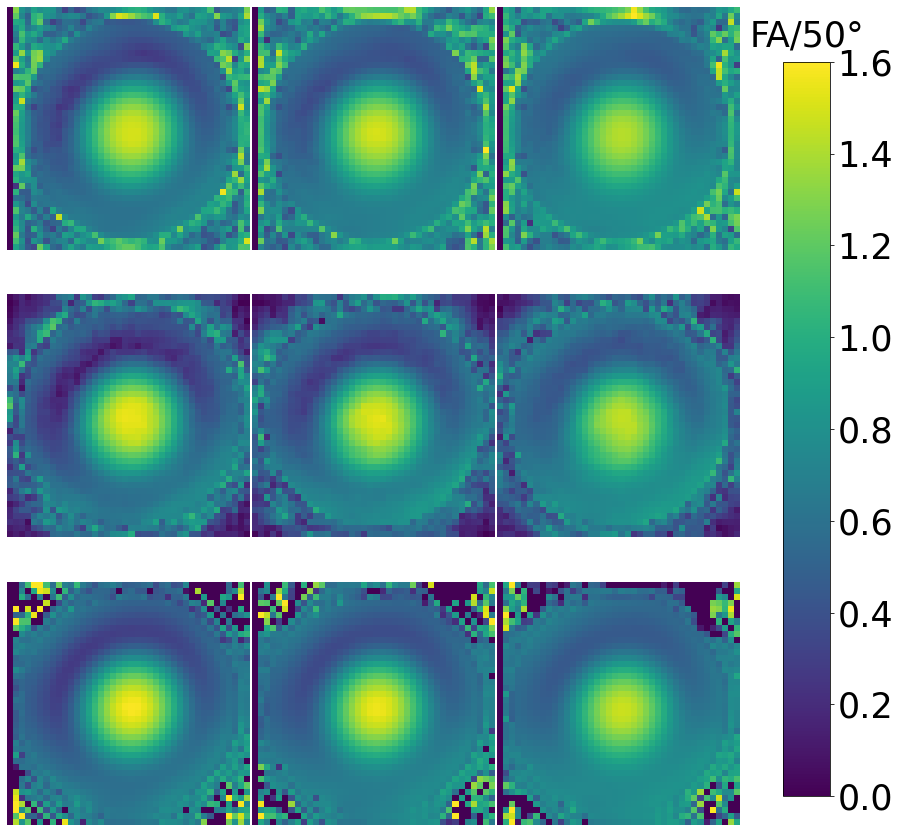

In [6]:
slice_first = 8

columns = 3
rows = 3
fig=plt.figure(figsize=(12, 12))
for slc in range(3):
    fig.add_subplot(rows, columns, slc+1)
    im = plt.imshow(fa_Cart[:,:,slice_first],vmax=1.6)
    plt.axis('off')
    plt.tight_layout(pad=0.2)
    
    fig.add_subplot(rows, columns, slc+1+3)
    im = plt.imshow(fa_map2D_ord[:,:,slice_first],vmax=1.6)
    plt.axis('off')
    plt.tight_layout(pad=0.2)
    
    fig.add_subplot(rows, columns, slc+1+6)
    im = plt.imshow(fa_Afi[:,:,slice_first],vmax=1.6)
    plt.axis('off')
    plt.tight_layout(pad=0.2)
    
    slice_first += 1

fig.subplots_adjust(right=0.85);
cbar_ax = fig.add_axes([0.9, 0.06, 0.055, 0.85]); #[left, bottom, width, height]
cbar_ax.set_title('FA/50°', pad=15, fontsize=35);
cbar_ax.tick_params(labelsize=35)
c= fig.colorbar(im, cax=cbar_ax);

## Flip angle mask for comparison

In [7]:
slices = 5
slice_first = 8
slice_last = 12

fa_Cart = fa_Cart[:,:,slice_first:slice_last+1]
fa_Afi  = fa_Afi[:,:,slice_first:slice_last+1]
fa_map2D_ord  = fa_map2D_ord[:,:,slice_first:slice_last+1]

fa_Cart = fa_Cart[15:30,15:30,:]
fa_Afi  = fa_Afi[15:30,15:30,:]
fa_map2D_ord  = fa_map2D_ord[15:30,15:30,:]

## Plotting of masks

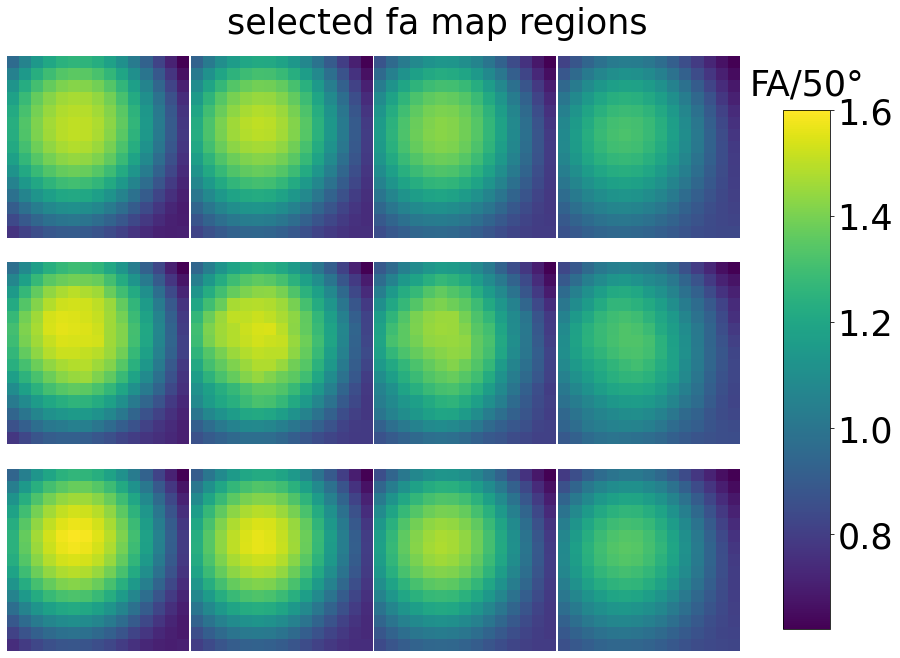

In [8]:
columns = 4
rows = 4
fig=plt.figure(figsize=(12, 12))
fig.suptitle('selected fa map regions', fontsize=35, y=1)
for slc in range(4):
    fig.add_subplot(rows, columns, slc+1)
    im = plt.imshow(fa_Cart[:,:,slc],vmax=1.6)
    plt.axis('off')
    plt.tight_layout(pad=0.2)
    
    fig.add_subplot(rows, columns, slc+1+4)
    im = plt.imshow(fa_map2D_ord[:,:,slc],vmax=1.6)
    plt.axis('off')
    plt.tight_layout(pad=0.2)
    
    fig.add_subplot(rows, columns, slc+1+8)
    im = plt.imshow(fa_Afi[:,:,slc],vmax=1.6)
    plt.axis('off')
    plt.tight_layout(pad=0.2)

fig.subplots_adjust(right=0.85);
cbar_ax = fig.add_axes([0.9, 0.28, 0.055, 0.6]); #[left, bottom, width, height]
cbar_ax.set_title('FA/50°', pad=15, fontsize=35);
cbar_ax.tick_params(labelsize=35)
c= fig.colorbar(im, cax=cbar_ax);

## For Statistical comparison

In [9]:
# transform 3D vectors into 1D vectors:
fa_Cart = fa_Cart.flatten()
fa_Afi = fa_Afi.flatten()
fa_map2D_ord = fa_map2D_ord.flatten()

## Statistical comparison: Cartesian 3Dream and Spiral 2Dream

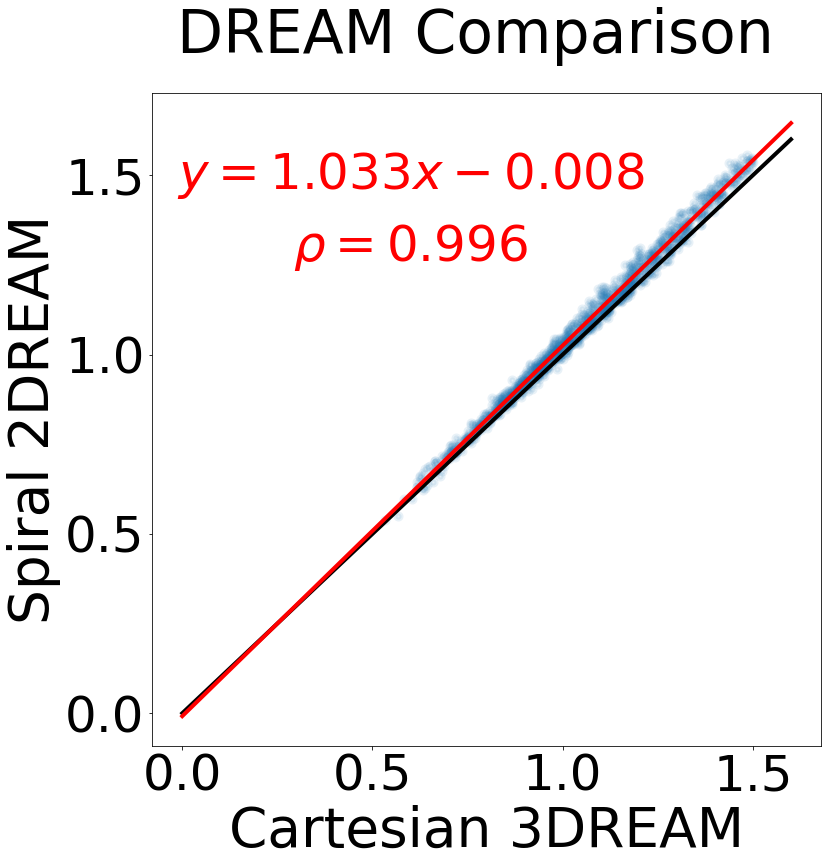

Cartesian 3DREAM - Spiral 2DREAM
slope = 1.033
intercept = -0.008
r_value = 0.996


In [11]:
# Scatterplot:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DREAM Comparison', fontsize=60)
plt.scatter(fa_Cart, fa_map2D_ord, alpha=0.1, linewidths=4)
plt.plot(np.array([0,1.6]),np.array([0,1.6]),color='black', linewidth=4)
slope, intercept, r_value, p_value, std_err = linregress(fa_Cart,fa_map2D_ord)
mn=0
mx=1.6
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x1,y1,'-r', linewidth=4)
plt.xlabel('Cartesian 3DREAM', fontsize=55)
plt.ylabel('Spiral 2DREAM', fontsize=55)
plt.text(0.6,1.5, r'$y = {}x {}$'.format(round(slope,3),round(intercept,3)), horizontalalignment='center',verticalalignment='center',color = 'r',fontsize=50)
plt.text(0.6,1.3, r'$\rho = {}$'.format(round(r_value,3)), horizontalalignment='center',verticalalignment='center',color = 'r',fontsize=50)
plt.tick_params(labelsize=50)
plt.show()

# Print parameters:
print("Cartesian 3DREAM - Spiral 2DREAM")
print("slope = {}".format(np.round(slope,3)))
print("intercept = {}".format(np.round(intercept,3)))
print("r_value = {}".format(np.round(r_value,3)))

## Statistical comparison: Cartesian 3Dream and AFI (AFI as gold-standard)

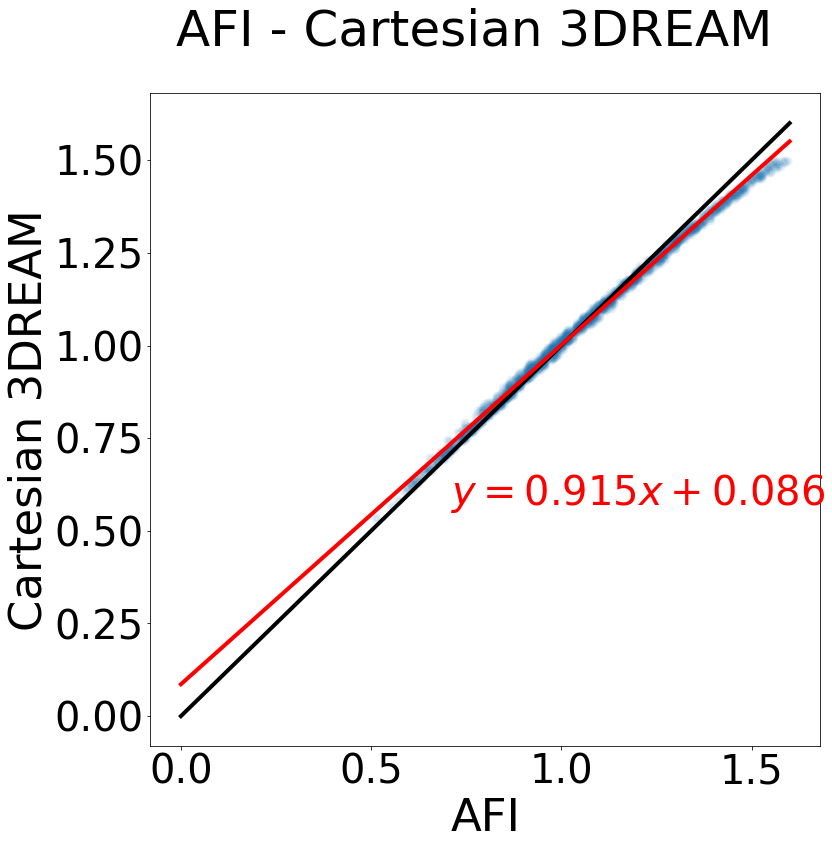

AFI - Cartesian 3DREAM
slope = 0.915
intercept = 0.086
r_value = 0.998


In [12]:
# Scatterplot:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('AFI - Cartesian 3DREAM', fontsize=50)
plt.scatter(fa_Afi, fa_Cart, alpha=0.1, linewidths=4)
plt.plot(np.array([0,1.6]),np.array([0,1.6]),color='black', linewidth=4)
slope, intercept, r_value, p_value, std_err = linregress(fa_Afi,fa_Cart)
mn=0
mx=1.6
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x1,y1,'-r', linewidth=4)
plt.xlabel('AFI', fontsize=45)
plt.ylabel('Cartesian 3DREAM', fontsize=45)
plt.text(1.2,0.6, r'$y = {}x + {}$'.format(round(slope,3),round(intercept,3)), horizontalalignment='center',verticalalignment='center',color = 'r',fontsize=40)
plt.tick_params(labelsize=40)
plt.show()

# Print parameters:
print("AFI - Cartesian 3DREAM")
print("slope = {}".format(np.round(slope,3)))
print("intercept = {}".format(np.round(intercept,3)))
print("r_value = {}".format(np.round(r_value,3)))

## Statistical comparison: Spiral 2Dream and AFI (AFI as gold-standard)

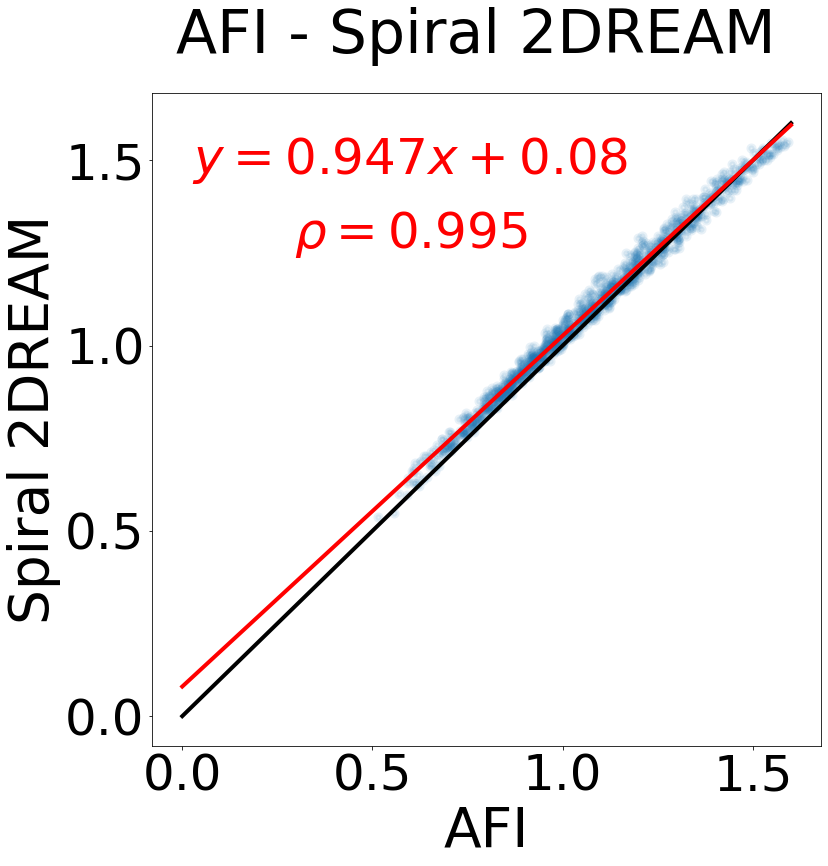

AFI - Spiral 2DREAM
slope = 0.947
intercept = 0.08
r_value = 0.995


In [13]:
# Scatterplot:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('AFI - Spiral 2DREAM', fontsize=60)
plt.scatter(fa_Afi, fa_map2D_ord, alpha=0.1, linewidths=4)
plt.plot(np.array([0,1.6]),np.array([0,1.6]),color='black', linewidth=4)
slope, intercept, r_value, p_value, std_err = linregress(fa_Afi,fa_map2D_ord)
mn=0
mx=1.6
x1=np.linspace(mn,mx,500)
y1=slope*x1+intercept
plt.plot(x1,y1,'-r', linewidth=4)
plt.xlabel('AFI', fontsize=55)
plt.ylabel('Spiral 2DREAM', fontsize=55)
plt.text(0.6,1.5, r'$y = {}x + {}$'.format(round(slope,3),round(intercept,3)), horizontalalignment='center',verticalalignment='center',color = 'r',fontsize=50)
plt.text(0.6,1.3, r'$\rho = {}$'.format(round(r_value,3)), horizontalalignment='center',verticalalignment='center',color = 'r',fontsize=50)
plt.tick_params(labelsize=50)
plt.show()

# Print parameters:
print("AFI - Spiral 2DREAM")
print("slope = {}".format(np.round(slope,3)))
print("intercept = {}".format(np.round(intercept,3)))
print("r_value = {}".format(np.round(r_value,3)))